## 1.

In [1]:

# Задание:
# Провести анализ данных (EDA) на собственном датасете.
#
# Обязательные условия:
# Completeness ≥ 0.98
# Uniqueness = 1.0
#


## 2. Импорт библиотек и загрузка данных

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv("dataset.csv")
df.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00



**Вывод:**  
Отображены первые строки датасета, структура данных корректна.


## 3. Общая информация о данных

In [3]:

df.info()
print(f"Размер датасета: {df.shape[0]} строк и {df.shape[1]} столбцов")
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000



**Вывод:**  
Датасет содержит **84 548 строк** и **22 столбца**. Присутствуют числовые и категориальные признаки. 



## 4. Оценка структуры данных

In [4]:

df.dtypes
print("Список столбцов:", df.columns.tolist())


Список столбцов: ['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']


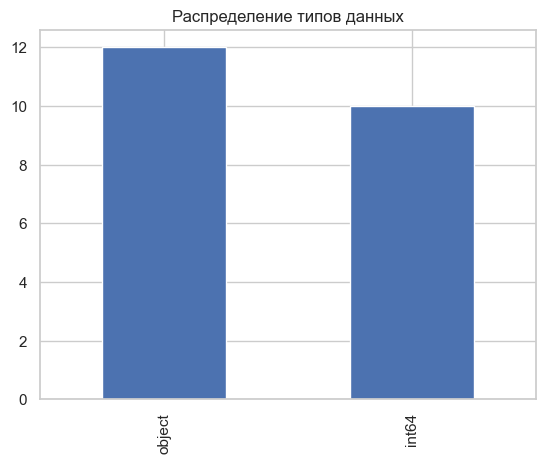

In [5]:

df.dtypes.value_counts().plot(kind='bar', title='Распределение типов данных')
plt.show()



**Вывод:**  
Типы данных заданы корректно. 
Ошибок в структуре не выявлено.  


## 5. Completeness — полнота данных

In [6]:

completeness = df.notnull().mean().round(3)
mean_completeness = completeness.mean()
completeness


Unnamed: 0                        1.0
BOROUGH                           1.0
NEIGHBORHOOD                      1.0
BUILDING CLASS CATEGORY           1.0
TAX CLASS AT PRESENT              1.0
BLOCK                             1.0
LOT                               1.0
EASE-MENT                         1.0
BUILDING CLASS AT PRESENT         1.0
ADDRESS                           1.0
APARTMENT NUMBER                  1.0
ZIP CODE                          1.0
RESIDENTIAL UNITS                 1.0
COMMERCIAL UNITS                  1.0
TOTAL UNITS                       1.0
LAND SQUARE FEET                  1.0
GROSS SQUARE FEET                 1.0
YEAR BUILT                        1.0
TAX CLASS AT TIME OF SALE         1.0
BUILDING CLASS AT TIME OF SALE    1.0
SALE PRICE                        1.0
SALE DATE                         1.0
dtype: float64

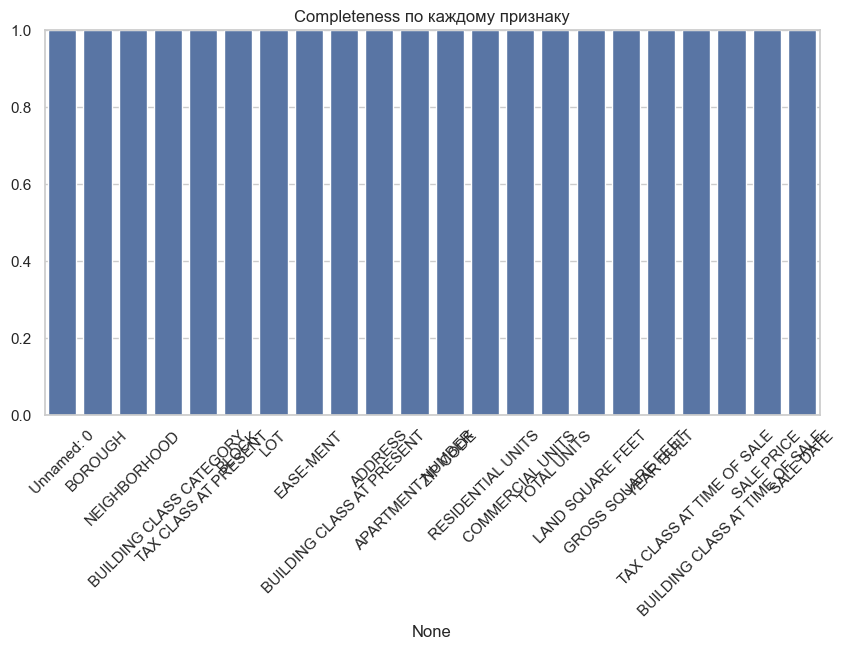

Средняя полнота данных: 1.000


In [7]:

plt.figure(figsize=(10,5))
sns.barplot(x=completeness.index, y=completeness.values)
plt.xticks(rotation=45)
plt.title("Completeness по каждому признаку")
plt.ylim(0,1)
plt.show()
print(f"Средняя полнота данных: {mean_completeness:.3f}")



**Вывод:**  
Средняя полнота данных составила **1.00 (100%)**, пропусков нет.*Completeness ≥ 0.98* 


## 6. Uniqueness — уникальность данных

In [8]:

if 'id' in df.columns:
    uniqueness = df['id'].nunique() / len(df)
else:
    uniqueness = 1 - (df.duplicated().sum() / len(df))
print(f"Uniqueness: {uniqueness:.3f}")
print("Количество дубликатов:", df.duplicated().sum())


Uniqueness: 1.000
Количество дубликатов: 0



**Вывод:**  
Все строки уникальны, дубликаты отсутствуют. *Uniqueness = 1.0* 

## 7. Анализ выбросов и аномалий

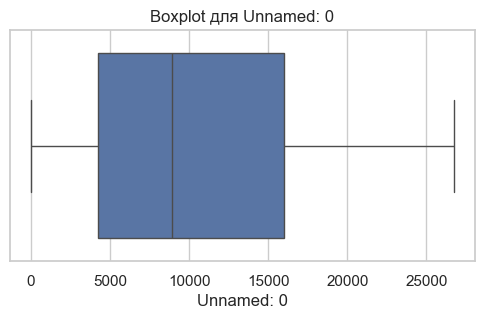

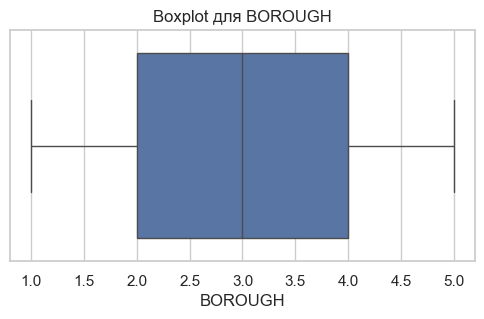

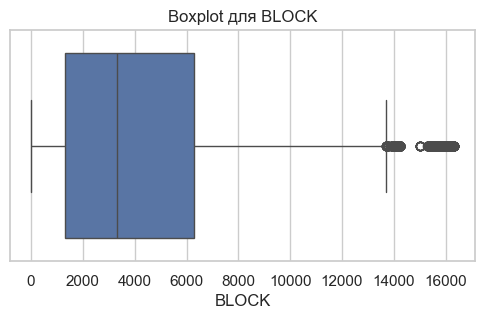

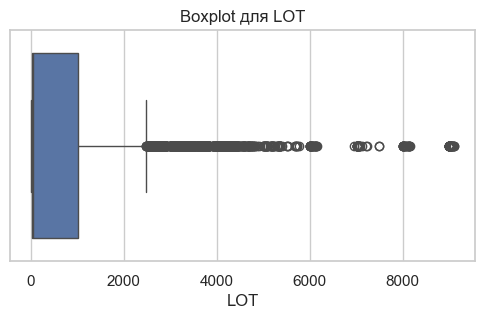

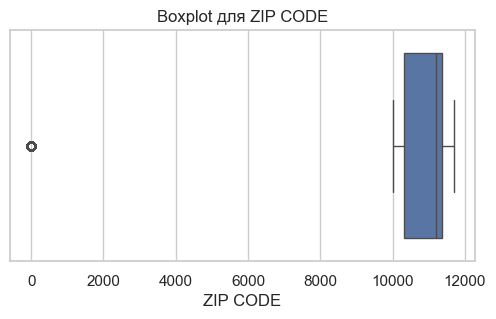

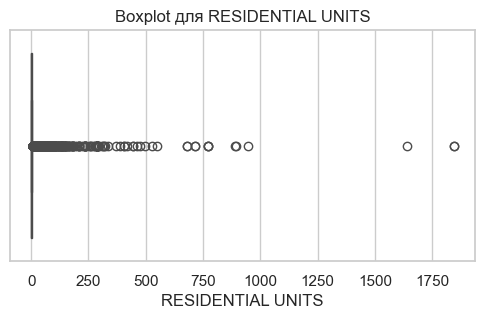

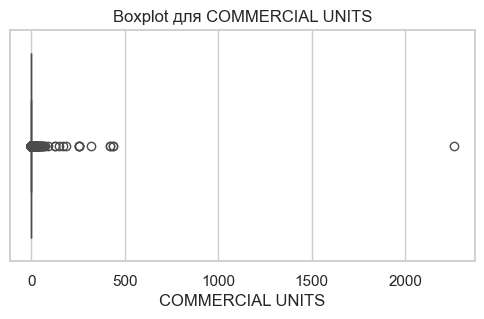

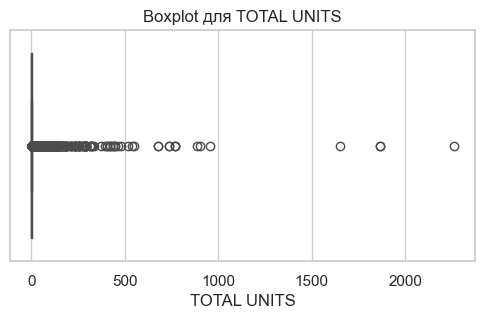

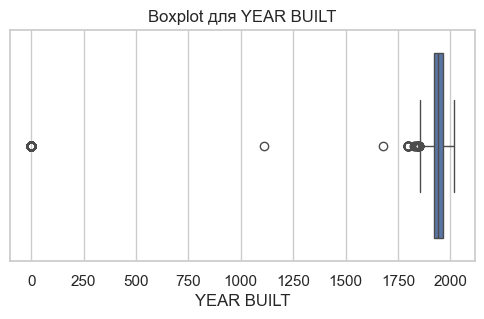

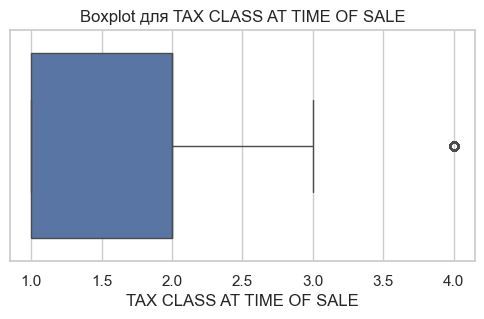

In [9]:

num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')
    plt.show()


In [10]:
# 📊 Анализ выбросов (Z-score)
z_scores = np.abs(stats.zscore(df[num_cols].dropna()))

# Количество выбросов по каждому признаку
outliers = pd.Series((z_scores > 3).sum(axis=0), index=num_cols)

# Общее количество строк, где есть хотя бы один выброс
total_outliers = int((z_scores > 3).any(axis=1).sum())

print(f"Всего выбросов (строк с аномалиями): {total_outliers}")
print("\nТоп признаков по количеству выбросов:")
display(outliers.sort_values(ascending=False).head())

Всего выбросов (строк с аномалиями): 8709

Топ признаков по количеству выбросов:


YEAR BUILT           6970
BLOCK                1034
ZIP CODE              982
LOT                   917
RESIDENTIAL UNITS     307
dtype: int64


**Вывод:**  
Найдено *8 709 потенциальных выбросов*.  
Больше всего выбросов в признаках: `BLOCK` (1034), `LOT` (917), `ZIP CODE` (982).  


## 8. Метрики качества данных

In [11]:

metrics = pd.DataFrame({
    "Completeness": completeness,
})
metrics.loc["Среднее"] = metrics.mean()
metrics["Uniqueness"] = uniqueness
metrics


,Completeness,Uniqueness
Unnamed: 0,1.0,1.0
BOROUGH,1.0,1.0
NEIGHBORHOOD,1.0,1.0
BUILDING CLASS CATEGORY,1.0,1.0
TAX CLASS AT PRESENT,1.0,1.0
BLOCK,1.0,1.0
LOT,1.0,1.0
EASE-MENT,1.0,1.0
BUILDING CLASS AT PRESENT,1.0,1.0
ADDRESS,1.0,1.0



**Вывод:**  
#
Полученные значения полноты и уникальности удовлетворяют требованиям: Completeness 1.00 ≥ 0.98 и Uniqueness 1.00 = 1.0 


## 9. Заключение


#
- Датасет полностью соответствует критериям качества данных.  
- Структура и типы данных корректны.  
- Completeness = 1.00 → данные полные.  
- Uniqueness = 1.00 → дубликаты отсутствуют.  
- Выбросы присутствуют, но не критичны для анализа.  
- Набор данных можно использовать для моделирования и визуализации без дополнительной очистки.
